In [1]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_theme(style="darkgrid")

## Preprocessing

In [2]:
res_ds = pl.read_csv('/kaggle/input/monkeytype-speed/results.csv', separator='|')
res_ds.sample(4)

_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
str,bool,f64,f64,f64,f64,str,str,i64,i64,i64,f64,i64,f64,bool,bool,str,str,str,bool,bool,bool,str,i64
"""644ece2b8b4254…",null,35.2,95.41,35.2,61.9,"""352,0,0,0""","""time""",120,-1,0,120.0,1,0.0,false,false,"""english_10k""","""none""","""normal""",false,false,false,"""63c1e4477c8d4d…",1682886187000
"""64398f98b32f40…",null,34.9,89.95,34.9,58.47,"""349,0,0,0""","""time""",120,-1,0,120.0,0,0.0,false,false,"""russian_10k""","""none""","""normal""",false,false,false,null,1681493912000
"""64456c60e695bd…",null,45.1,93.06,45.1,62.79,"""451,0,0,0""","""time""",120,-1,0,120.0,2,0.0,false,false,"""russian_10k""","""none""","""normal""",false,false,false,"""63c1e4477c8d4d…",1682271328000
"""642bfd850a366c…",null,29.5,85.8,29.5,63.0,"""295,0,0,0""","""time""",120,-1,0,120.01,0,0.0,false,false,"""russian_10k""","""none""","""normal""",false,false,false,"""63c1e4477c8d4d…",1680604549000


In [3]:
res_ds.describe()

describe,_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
str,str,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,f64,f64,str,f64
"""count""","""1000""",1000.0,1000.0,1000.0,1000.0,1000.0,"""1000""","""1000""",1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,"""1000""","""1000""","""1000""",1000.0,1000.0,1000.0,"""1000""",1000.0
"""null_count""","""0""",950.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,0.0,0.0,"""4""",0.0
"""mean""",null,1.0,40.74695,92.83754,40.82715,64.1939,null,null,120.477,-0.996,0.179,120.43389,0.759,1.57046,0.0,0.0,null,null,null,0.0,0.0,0.0,null,1.6823e12
"""std""",null,0.0,7.5442,3.228795,7.526203,5.904504,null,null,15.604646,0.089398,0.646047,10.835549,2.560366,8.091243,0.0,0.0,null,null,null,0.0,0.0,0.0,null,1.3363e9
"""min""","""641dc8c5864bf5…",1.0,10.3,79.07,10.3,2.85,"""103,0,0,0""","""quote""",100.0,-1.0,0.0,66.25,0.0,0.0,0.0,0.0,"""english_10k""","""none""","""normal""",0.0,0.0,0.0,"""63c1e4477c8d4d…",1.6797e12
"""max""","""6473c5b2c7b2e7…",1.0,56.2,98.94,56.2,76.82,"""900,0,0,0""","""words""",612.0,1.0,9.0,396.2,52.0,106.88,0.0,0.0,"""russian_25k""","""none""","""normal""",0.0,0.0,0.0,"""63c1e4477c8d4d…",1.6853e12
"""median""",null,1.0,42.35,93.395,42.35,64.955,null,null,120.0,-1.0,0.0,120.0,0.0,0.0,0.0,0.0,null,null,null,0.0,0.0,0.0,null,1.6823e12
"""25%""",null,null,36.7,90.91,36.7,61.85,null,null,120.0,-1.0,0.0,120.0,0.0,0.0,null,null,null,null,null,null,null,null,null,1.6810e12
"""75%""",null,null,46.3,95.19,46.3,67.68,null,null,120.0,-1.0,0.0,120.01,1.0,0.0,null,null,null,null,null,null,null,null,null,1.6834e12


In [4]:
def process(df):
    temp = df.filter(pl.col('mode') == 'time')
    temp = temp.filter(pl.col('mode2') == 120)
    temp = temp.filter(pl.col('restartCount') == 0)
    temp = temp.filter(pl.col('afkDuration') <= 10)
    temp = temp.filter(pl.col('incompleteTestSeconds') == 0.)
    temp = temp.filter(pl.col('punctuation') == 'false')
    temp = temp.filter(pl.col('numbers') == 'false')
    temp = temp.filter(pl.col('language').is_in(['russian_10k', 'english_10k']))
    temp = temp.filter(pl.col('funbox') == 'none')
    temp = temp.filter(pl.col('difficulty') == 'normal')
    temp = temp.filter(pl.col('lazyMode') == 'false')
    temp = temp.filter(pl.col('blindMode') == 'false')
    temp = temp.filter(pl.col('bailedOut') == 'false')

    temp = temp.drop('_id', 
                     'isPb', 
                     'mode', 
                     'mode2', 
                     'quoteLength', 
                     'restartCount', 
                     'testDuration', 
                     'afkDuration', 
                     'incompleteTestSeconds', 
                     'punctuation', 
                     'numbers', 
                     'funbox', 
                     'difficulty', 
                     'lazyMode', 
                     'blindMode', 
                     'bailedOut', 
                     'tags')


    temp = temp.sort(by=['timestamp'])
    
    return temp

In [5]:
temp = process(res_ds)
times = pl.Series([datetime.fromtimestamp(i / 1000) for i in temp['timestamp']])
temp = temp.with_columns(pl.Series(name='date', values=times))
temp = temp.with_columns(pl.Series(name='day', values=times.apply(lambda r:str(r.month) + '.' + str(r.day))))

display(temp.tail(10))
temp.shape

wpm,acc,rawWpm,consistency,charStats,language,timestamp,date,day
f64,f64,f64,f64,str,str,i64,datetime[μs],str
43.3,92.75,43.3,68.59,"""433,0,0,0""","""english_10k""",1685010477000,2023-05-25 10:27:57,"""5.25"""
44.7,94.47,44.7,59.93,"""447,0,0,0""","""english_10k""",1685011008000,2023-05-25 10:36:48,"""5.25"""
47.8,94.82,47.8,67.61,"""478,0,0,0""","""english_10k""",1685116634000,2023-05-26 15:57:14,"""5.26"""
51.9,96.4,51.9,69.62,"""519,0,0,0""","""english_10k""",1685124601000,2023-05-26 18:10:01,"""5.26"""
46.9,96.92,46.9,67.19,"""469,0,0,0""","""english_10k""",1685307008000,2023-05-28 20:50:08,"""5.28"""
50.1,97.71,50.1,68.03,"""501,0,0,0""","""english_10k""",1685307526000,2023-05-28 20:58:46,"""5.28"""
41.7,94.73,41.7,66.54,"""417,0,0,0""","""english_10k""",1685307913000,2023-05-28 21:05:13,"""5.28"""
39.5,94.08,39.5,56.04,"""395,0,0,0""","""english_10k""",1685308036000,2023-05-28 21:07:16,"""5.28"""
45.4,96.73,45.4,64.01,"""454,0,0,0""","""english_10k""",1685308541000,2023-05-28 21:15:41,"""5.28"""


(831, 9)

In [6]:
first = temp.with_columns(pl.Series(name='kind', values=['wpm' for n in temp['wpm']]))
first = first.drop('acc')
first = first.rename({'wpm':'res'})

second = temp.with_columns(pl.Series(name='kind', values=['acc' for n in temp['wpm']]))
second = second.drop('wpm')
second = second.rename({'acc':'res'})

temp_sec = pl.concat([first, second])
display(temp_sec.head(3))
display(temp_sec.tail(3))

res,rawWpm,consistency,charStats,language,timestamp,date,day,kind
f64,f64,f64,str,str,i64,datetime[μs],str,str
25.7,25.7,55.35,"""257,0,0,0""","""russian_10k""",1679999528000,2023-03-28 10:32:08,"""3.28""","""wpm"""
25.4,25.7,57.89,"""254,1,0,0""","""russian_10k""",1680003647000,2023-03-28 11:40:47,"""3.28""","""wpm"""
23.2,23.2,62.66,"""232,0,0,0""","""russian_10k""",1680199143000,2023-03-30 17:59:03,"""3.30""","""wpm"""


res,rawWpm,consistency,charStats,language,timestamp,date,day,kind
f64,f64,f64,str,str,i64,datetime[μs],str,str
94.08,39.5,56.04,"""395,0,0,0""","""english_10k""",1685308036000,2023-05-28 21:07:16,"""5.28""","""acc"""
96.73,45.4,64.01,"""454,0,0,0""","""english_10k""",1685308541000,2023-05-28 21:15:41,"""5.28""","""acc"""
97.23,43.5,61.08,"""435,0,0,0""","""english_10k""",1685308665000,2023-05-28 21:17:45,"""5.28""","""acc"""


## Visualization

/tmp/ipykernel_20/3858126604.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


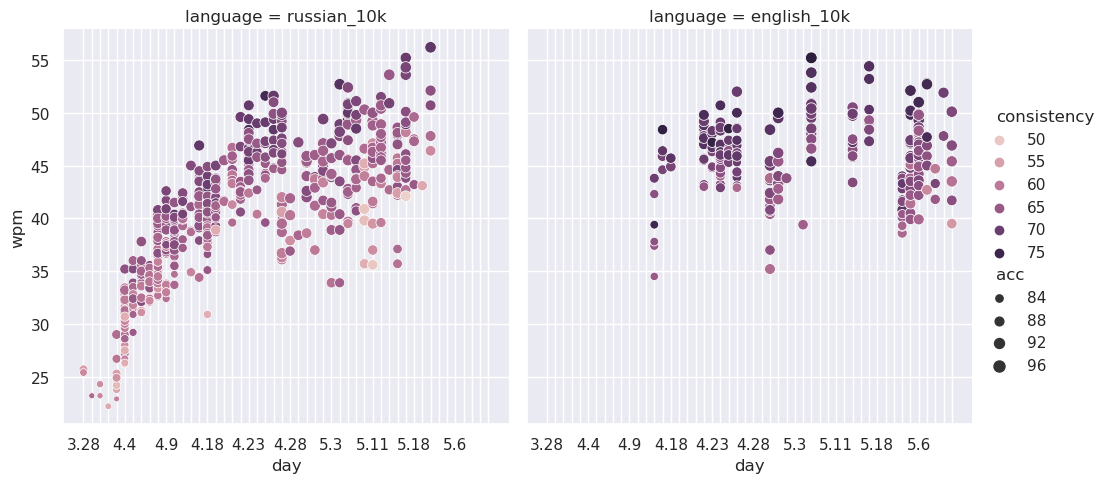

In [7]:
r = sns.relplot(
    data=temp,
    x="day", y="wpm", col="language", size="acc", hue='consistency'
)

for ax in r.axes.flat:
    labels = ax.get_xticklabels() 
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
    ax.set_xticklabels(labels) 

/opt/conda/lib/python3.10/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_20/3539796048.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


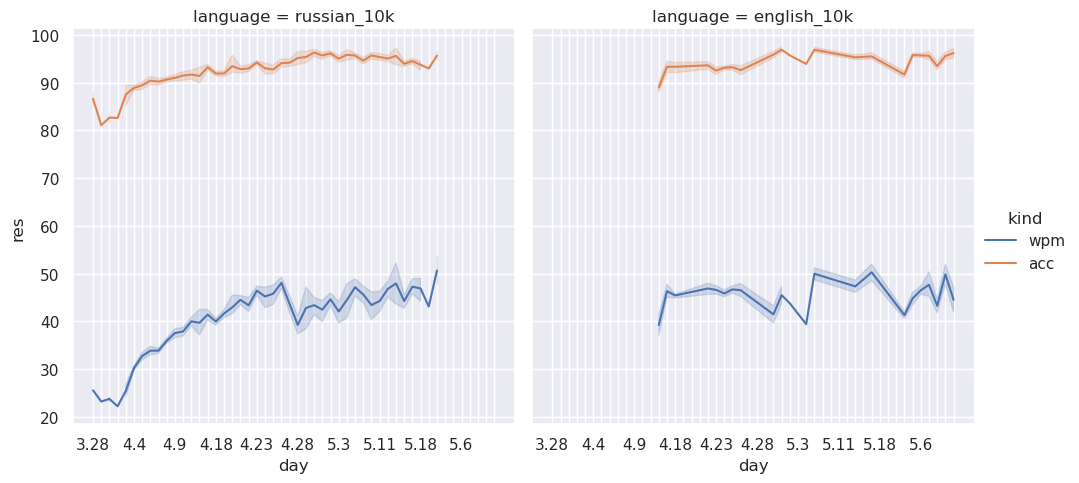

In [8]:
r = sns.relplot(
    data=temp_sec, 
    x="day", y="res", col="language", hue='kind', kind="line", ax=ax
)

for ax in r.axes.flat:
    labels = ax.get_xticklabels() 
    for i,l in enumerate(labels):
        if(i%5 != 0): labels[i] = '' 
        pass
    ax.set_xticklabels(labels) 